In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

import spacy
from textblob import TextBlob


df = pd.read_csv("Emotion_final.csv")
pd.set_option('display.max_columns', None)  

c:\Users\impej\miniconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\impej\AppData\Roaming\Python\Python310\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


## création de la BDD fake avec elastique search 

In [1]:
# import requests
# import json
# from faker import Faker

# url = 'http://localhost:9200/notes/_bulk'
# headers = {'Content-Type': 'application/x-ndjson'}

# faker = Faker()

# data = ''
# for _ in range(100):
#     patient_lastname = faker.last_name()
#     patient_firstname = faker.first_name()
#     text = faker.text()
#     date = faker.date()
#     patient_left = faker.boolean()
#     emotion = faker.word()
#     confidence = faker.pyfloat(left_digits=1, right_digits=2, positive=True)

#     index = {"index": {}}
#     doc = {
#         "patient_lastname": patient_lastname,
#         "patient_firstname": patient_firstname,
#         "text": text,
#         "date": date,
#         "patient_left": patient_left,
#         "emotion": emotion,
#         "confidence": confidence
#     }

#     data += json.dumps(index) + '\n'
#     data += json.dumps(doc) + '\n'

# response = requests.post(url, headers=headers, data=data)
# print(response.text)


{"took":755,"errors":false,"items":[{"index":{"_index":"notes","_type":"_doc","_id":"h5IEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":0,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"iJIEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":1,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"iZIEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":2,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"ipIEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":3,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"i5IEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":4,"_primary_term":1

In [5]:
import requests
import json

url = 'http://localhost:9200/notes/_search'
headers = {'Content-Type': 'application/json'}

query = {
    "query": {
        "match_all": {}
    }
}

response = requests.get(url, headers=headers, data=json.dumps(query))
print(response.text)


{"took":2,"timed_out":false,"_shards":{"total":1,"successful":1,"skipped":0,"failed":0},"hits":{"total":{"value":10000,"relation":"gte"},"max_score":1.0,"hits":[{"_index":"notes","_type":"_doc","_id":"P2_cPokBu-ltDv36D462","_score":1.0,"_source":{"patient_lastname":"Patton","patient_firstname":"Rhonda","text":"i didnt feel humiliated","date":"2008-04-19","patient_left":false,"emotion":"sadness","confidence":1.0}},{"_index":"notes","_type":"_doc","_id":"QG_cPokBu-ltDv36D47q","_score":1.0,"_source":{"patient_lastname":"Delgado","patient_firstname":"David","text":"i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake","date":"1995-07-31","patient_left":true,"emotion":"sadness","confidence":0.73}},{"_index":"notes","_type":"_doc","_id":"QW_cPokBu-ltDv36EI4Q","_score":1.0,"_source":{"patient_lastname":"Griffin","patient_firstname":"Jason","text":"im grabbing a minute to post i feel greedy wrong","date":"1993-06-15","patient_left":false,

In [6]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df = pd.read_csv("Emotion_final.csv")

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    filtered_tokens = [token for token in tokens if not (nlp.vocab[token].is_punct or nlp.vocab[token].is_stop or len(token) < 3 or token.isnumeric() or token.isspace() or token.lower() in {'feel', 'feeling','feelings', 'like','im','really', 'today','didnt','go', 'know', 'get', 'want', 'would', 'time', 'little', 'ive', 'still', 'even', 'one',  'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could'})]    
    return ' '.join(filtered_tokens)

corpus = df['Text'].tolist()
corpus = [preprocess(text) for text in corpus]

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['000' '12' '1997' ... 'zum' 'zumba' 'zzap']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


y = df['Emotion'].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [10]:
from elasticsearch import Elasticsearch
from faker import Faker

faker = Faker()

# Prédictions de probabilité pour chaque texte
proba = clf.predict_proba(X)

# Récupération des étiquettes de classe
class_labels = le.inverse_transform(clf.classes_)

# Remplissage des colonnes "emotion" et "confidence"
df['emotion'] = [class_labels[np.argmax(p)] for p in proba]
df['confidence'] = [np.max(p) for p in proba]

# Génération d'une liste de 150 noms de patients uniques
patients = []
for _ in range(150):
    patient_lastname = faker.last_name()
    patient_firstname = faker.first_name()
    patient_left = faker.boolean()
    patients.append((patient_lastname, patient_firstname, patient_left))

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Indexation des données dans Elasticsearch
for i, row in df.iterrows():
    patient_lastname, patient_firstname, patient_left = patients[i % 150]
    date = faker.date()
    
    doc = {
        'patient_lastname': patient_lastname,
        'patient_firstname': patient_firstname,
        'text': row['Text'],
        'date': date,
        'patient_left': patient_left,
        'emotion': row['emotion'],
        'confidence': row['confidence']
    }
    es.index(index='notes', body=doc)


C:\Users\impej\AppData\Local\Temp\ipykernel_20524\1316291653.py:41: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  es.index(index='notes', body=doc)
C:\Users\impej\AppData\Local\Temp\ipykernel_20524\1316291653.py:41: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.index(index='notes', body=doc)


In [2]:
from elasticsearch import Elasticsearch
import psycopg2

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Requête de recherche pour récupérer tous les documents
query = {
    "query": {
        "match_all": {}
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query, size=10000)

# Récupération des résultats
hits = res['hits']['hits']

# Connexion à PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="patient",
    user="postgres",
    password="morgane"
)
cur = conn.cursor()

# Insertion des données dans la table
for hit in hits:
    doc = hit['_source']
    patient_lastname = doc['patient_lastname']
    patient_firstname = doc['patient_firstname']
    date = doc['date']
    patient_left = doc['patient_left']
    
    cur.execute(
        "INSERT INTO liste_patients (patient_lastname, patient_firstname, date, patient_left) VALUES (%s, %s, %s, %s)",
        (patient_lastname, patient_firstname, date, patient_left)
    )

# Validation des modifications
conn.commit()

# Fermeture des connexions
cur.close()
conn.close()


C:\Users\impej\AppData\Local\Temp\ipykernel_9360\2155213595.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query, size=10000)
C:\Users\impej\AppData\Local\Temp\ipykernel_9360\2155213595.py:15: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query, size=10000)


In [9]:
from elasticsearch import Elasticsearch

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Requête de recherche pour récupérer tous les documents
query = {
    "query": {
        "match": {
            "emotion": "happy"
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Affichage des résultats
for hit in hits:
    print(hit['_source'])


{'patient_lastname': 'Young', 'patient_firstname': 'James', 'text': 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'date': '1991-03-23', 'patient_left': True, 'emotion': 'happy', 'confidence': 0.7696511698531237}
{'patient_lastname': 'Smith', 'patient_firstname': 'Caleb', 'text': 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter', 'date': '1986-10-30', 'patient_left': True, 'emotion': 'happy', 'confidence': 0.973448275862069}
{'patient_lastname': 'Murray', 'patient_firstname': 'Jeffrey', 'text': 'i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious', 'date': '2023-03-15', 'patient_left': True, 'emotion': 'happy', 'confidence': 0.94}
{'patient_lastname': 'Jacobson', 'patient_firstname': 'Christopher', 'text': 

C:\Users\impej\AppData\Local\Temp\ipykernel_8592\1124562407.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_8592\1124562407.py:16: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


In [7]:
import psycopg2

# Connexion à PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="patient",
    user="postgres",
    password="morgane"
)
cur = conn.cursor()

# Exécution d'une requête SELECT pour récupérer les données de la table
cur.execute("SELECT * FROM patients")

# Récupération des résultats
rows = cur.fetchall()

# Affichage des résultats
for row in rows:
    print(row)

# Fermeture des connexions
cur.close()
conn.close()


('Patton', 'Rhonda', datetime.date(2008, 4, 19), False)
('Delgado', 'David', datetime.date(1995, 7, 31), True)
('Griffin', 'Jason', datetime.date(1993, 6, 15), False)
('Haas', 'Dawn', datetime.date(2008, 1, 23), True)
('Lucas', 'Sara', datetime.date(1998, 3, 22), False)
('Walter', 'Amanda', datetime.date(2015, 2, 26), True)
('Juarez', 'Richard', datetime.date(2021, 7, 5), True)
('Hanson', 'Beverly', datetime.date(2011, 11, 18), False)
('Young', 'James', datetime.date(1991, 3, 23), True)
('Thompson', 'John', datetime.date(1971, 7, 31), False)
('Wright', 'Kimberly', datetime.date(1985, 1, 25), False)
('Smith', 'Caleb', datetime.date(1986, 10, 30), True)
('Wood', 'Marcus', datetime.date(1972, 9, 12), False)
('Davis', 'Kevin', datetime.date(1992, 5, 22), True)
('Murray', 'Jeffrey', datetime.date(2023, 3, 15), True)
('Jacobson', 'Christopher', datetime.date(1972, 8, 20), True)
('Lane', 'Maria', datetime.date(2013, 9, 11), False)
('Morris', 'Laura', datetime.date(2010, 2, 10), True)
('Vaugha

# effacement

In [3]:
# import requests

# index = 'notes'  # Remplacez par le nom de votre index

# # URL de l'API de suppression des documents
# url = f'http://localhost:9200/{index}/_delete_by_query'

# # Corps de la requête de suppression
# query = {
#     "query": {
#         "match_all": {}
#     }
# }

# # Envoyer la requête de suppression
# response = requests.post(url, json=query)

# # Vérifier la réponse
# if response.status_code == 200:
#     print("Les documents ont été supprimés avec succès.")
# else:
#     print("Une erreur s'est produite lors de la suppression des documents.")
#     print(response.text)

Les documents ont été supprimés avec succès.


 ## En recherchant dans la base elastic search, aboutissez à un data frame permettant d’afficher la répartition des sentiments des textes pour un patient (nom/prénom)

In [13]:
from elasticsearch import Elasticsearch
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Nom et prénom du patient
patient_lastname = 'Harris'
patient_firstname = 'Paula'

# Requête de recherche pour récupérer les documents correspondant au patient
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Création d'un DataFrame à partir des résultats
data = [hit['_source'] for hit in hits]
df = pd.DataFrame(data)

# Calcul de la répartition des sentiments
sentiment_counts = df['emotion'].value_counts(normalize=True)

# Affichage des résultats
print(sentiment_counts)


sadness    0.4
happy      0.3
anger      0.1
love       0.1
fear       0.1
Name: emotion, dtype: float64


C:\Users\impej\AppData\Local\Temp\ipykernel_20524\362217112.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_20524\362217112.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


In [14]:
from elasticsearch import Elasticsearch
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Nom et prénom du patient
patient_lastname = 'Harris'
patient_firstname = 'Paula'

# Requête de recherche pour récupérer les documents correspondant au patient
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Création d'un DataFrame à partir des résultats
data = [hit['_source'] for hit in hits]
df = pd.DataFrame(data)

# Affichage si le patient est parti ou non
if not df.empty:
    print(f"Patient parti: {df.iloc[0]['patient_left']}")
else:
    print("Aucun document trouvé pour ce patient")

# Calcul de la répartition des sentiments
sentiment_counts = df['emotion'].value_counts(normalize=True)

# Affichage de la répartition des sentiments
print("\nRépartition des sentiments:")
print(sentiment_counts)


Patient parti: False

Répartition des sentiments:
sadness    0.4
happy      0.3
anger      0.1
love       0.1
fear       0.1
Name: emotion, dtype: float64


C:\Users\impej\AppData\Local\Temp\ipykernel_20524\3792446303.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_20524\3792446303.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


####  Élaborez une matrice de sentiments contradictoire (toujours en utilisant la base elastic search.
#### On veut savoir parmi les documents classifiés comme happy, quel pourcentage contient le mot “sadness”. Puis quel pourcentage contient “fear” …
#### Et cela pour tous les sentiment.
#### On représente les résultats dans une HeatMap


C:\Users\impej\AppData\Local\Temp\ipykernel_17936\456390437.py:26: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_17936\456390437.py:26: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index='notes', body=query)


Text(0.5, 1.0, 'Contradictory Emotions Heatmap')

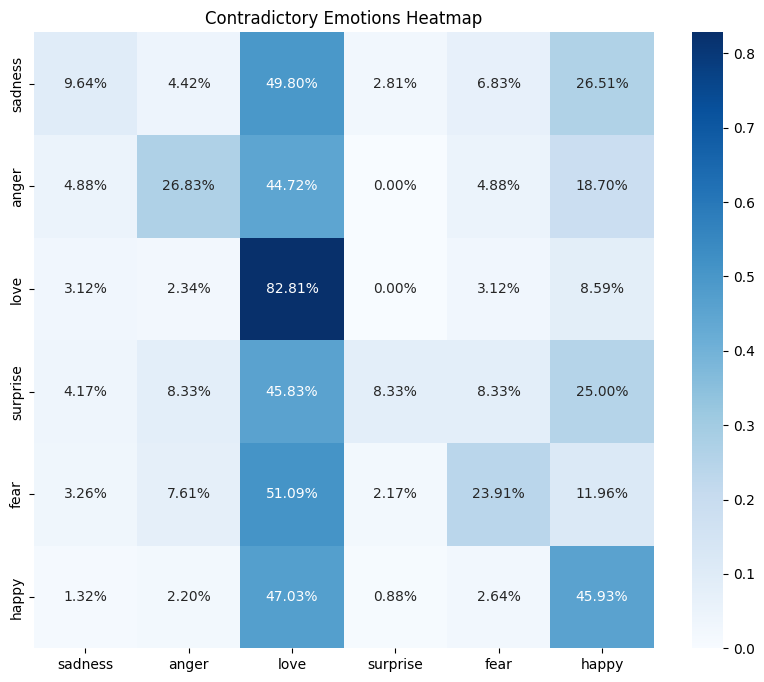

In [18]:
from elasticsearch import Elasticsearch
import seaborn as sns
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Liste des sentiments
emotions = ['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']

# Calcul de la matrice de sentiments contradictoires
data = []
for emotion in emotions:
    row = []
    for word in emotions:
        query = {
            "query": {
                "bool": {
                    "must": [
                        {"match": {"emotion": emotion}},
                        {"match": {"text": word}}
                    ]
                }
            }
        }
        response = es.search(index='notes', body=query)
        count = response['hits']['total']['value']
        row.append(count)
    data.append(row)

# Création d'un DataFrame avec les données
df = pd.DataFrame(data, index=emotions, columns=emotions)

# Normalisation des données par ligne
df = df.div(df.sum(axis=1), axis=0)

# Affichage de la heatmap
plt.figure(figsize=(10,8))
ax = sns.heatmap(df, annot=True, cmap='Blues', fmt='.2%')

# Ajout d'un titre
ax.set_title('Contradictory Emotions Heatmap')



### Pour chacune des étapes du deuil (denial, anger, bargaining, depression, and acceptance) rechercher le nombre de text correspondants à l’aide:
###         - d’une recherche pleine
###         - d’une fuzzy recherche.  → on peut spécifier sur type de query un niveau de “fuzziness” (fautes de frappe)


In [16]:
from elasticsearch import Elasticsearch
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Étapes du deuil
stages = ['denial', 'anger', 'bargaining', 'depression', 'acceptance']

# Recherche pleine
def full_search(stage):
    query = {
        "query": {
            "match": {
                "text": stage
            }
        }
    }
    res = es.search(index='notes', body=query)
    return res['hits']['total']['value']

# Recherche floue (fuzzy search)
def fuzzy_search(stage):
    query = {
        "query": {
            "fuzzy": {
                "text": stage
            }
        }
    }
    res = es.search(index='notes', body=query)
    return res['hits']['total']['value']

# Résultats de la recherche
results = []
for stage in stages:
    full_count = full_search(stage)
    fuzzy_count = fuzzy_search(stage)
    results.append([stage, full_count, fuzzy_count])

# Création d'un DataFrame pour afficher les résultats
df_deuil = pd.DataFrame(results, columns=['Stage', 'Full Search', 'Fuzzy Search'])
print(df_deuil)


C:\Users\impej\AppData\Local\Temp\ipykernel_17936\1302518558.py:19: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_17936\1302518558.py:19: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_17936\1302518558.py:31: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_17936\1302518558.py:31: ElasticsearchWarning: Elasticsearch built-in security features are not

        Stage  Full Search  Fuzzy Search
0      denial            2           119
1       anger           66            82
2  bargaining            0             0
3  depression           23            84
4  acceptance            9            71


### Rechercher les textes:
####            - qui doivent matcher l’expression “good day” (must)
####            - chez les patients encore en consultation (filter)
####            - qui contiennent si possible “to rest” (should)
####            - qui ne doivent pas avoir seuil de confiance inférieur à 0.5 s’il existe. 
####            - Observer la répartition de ces résultats par sentiment

In [6]:
from elasticsearch import Elasticsearch
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Requête de recherche pour récupérer les documents correspondant aux critères
query = {
    "query": {
        "bool": {
            "must": [
                {"match_phrase": {"text": "good day"}}
            ],
            "filter": [
                {"term": {"patient_left": False}}
            ],
            "should": [
                {"match_phrase": {"text": "to rest"}}
            ],
            "must_not": [
                {"range": {"confidence": {"lt": 0.5}}}
            ]
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Création d'un DataFrame à partir des résultats
data = [hit['_source'] for hit in hits]
df = pd.DataFrame(data)

# Affichage des textes des documents
print("Textes des documents:")
for text in df['text']:
    print(f"- {text}")

# Calcul de la répartition des sentiments
sentiment_counts = df['emotion'].value_counts(normalize=True)

# Affichage de la répartition des sentiments
print("\nRépartition des sentiments:")
print(sentiment_counts)


Textes des documents:
- ` Did you have a good day at the office ? " she asked , hearing herself with horr
- i was feeling pretty anxious all day but my first day at work was a very good day and that helped a lot
- i had a good day but right now im feeling pretty irritable for no real reason meaning nothing significant happened to make me feel annoyed

Répartition des sentiments:
fear     0.666667
anger    0.333333
Name: emotion, dtype: float64


C:\Users\impej\AppData\Local\Temp\ipykernel_26508\2319278150.py:28: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_26508\2319278150.py:28: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


In [20]:
from elasticsearch import Elasticsearch

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Obtention des statistiques de l'index
stats = es.indices.stats(index='notes')

# Taille de l'index en octets
size_in_bytes = stats['_all']['primaries']['store']['size_in_bytes']

print(f"Taille de l'index 'notes': {size_in_bytes} octets")


Taille de l'index 'notes': 8172317 octets


C:\Users\impej\AppData\Local\Temp\ipykernel_17936\4278657928.py:7: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  stats = es.indices.stats(index='notes')


### questions théoriques

### Qu’est ce que le sharding, comment pourrait-on imaginer un sharding sur cet index?


Le sharding dans Elasticsearch permet de distribuer les données sur plusieurs nœuds pour une meilleure évolutivité et une meilleure performance. Cela permet également de répartir la charge de travail entre les nœuds et d'optimiser l'utilisation des ressources disponibles.
La quantitée de données sur le projet n'est pas suffisante pour necessiter l'utilisation du sharding. Mais on pourrait imager en cas de besoin créer 2 (ou plus suivant la taille de la BDD) shards primaires ou l'on sépare les patients encore suivis (patient_left:false) et des replicats sur chaques nœuds.

### Quels ingestion pipelines seraient pertinents pour notre sujet.

Extraction de champs: Si les  documents contiennent des données structurées sous forme de texte (par exemple, des données **JSON** ou **CSV**), on peut utiliser un processeur tel que `json` ou `csv` pour extraire les champs pertinents à partir du contenu du document et les stocker en tant que champs distincts dans l’index.

## Intégration de la gestion des stopwords au niveau du mapping


In [ ]:
# from elasticsearch import Elasticsearch

# # Connexion à Elasticsearch
# es = Elasticsearch(hosts=['http://localhost:9200'])

# # Création d'un index avec un filtre de stopwords
# es.indices.create(index='notes', body={
#     'settings': {
#         'analysis': {
#             'analyzer': {
#                 'my_analyzer': {
#                     'type': 'standard',
#                     'stopwords': '_english_'
#                 }
#             }
#         }
#     },
#     'mappings': {
#         'properties': {
#             'text': {
#                 'type': 'text',
#                 'analyzer': 'my_analyzer'
#             }
#         }
#     }
# })


## Intégration d’un modèle de ML comme pipeline d’ingestion


In [ ]:
# import json
# from elasticsearch import Elasticsearch
# from sklearn.ensemble import RandomForestClassifier

# # Connexion à Elasticsearch
# es = Elasticsearch(hosts=['http://localhost:9200'])

# # Votre modèle existant
# clf = RandomForestClassifier()

# # Sérialisation du modèle au format JSON
# model = json.dumps(clf)

# # Stockage du modèle dans Elasticsearch
# es.ml.put_trained_model(model_id='my_model', body=model)



# #########################################
# # Une fois que votre modèle est stocké dans Elasticsearch, vous pouvez créer un pipeline d’ingestion qui utilise le processeur 
# # inference pour appliquer votre modèle aux documents lors de leur indexation. Voici un exemple de code qui crée un pipeline d’ingestion 
# # nommé my_pipeline qui utilise le processeur inference pour appliquer votre modèle pré-entraîné nommé my_model aux documents lors 
# # de leur indexation:
# #########################################


# from elasticsearch import Elasticsearch

# # Connexion à Elasticsearch
# es = Elasticsearch(hosts=['http://localhost:9200'])

# # Création d'un pipeline d'ingestion avec le processeur inference
# es.ingest.put_pipeline(id='my_pipeline', body={
#     'description': 'My Ingest Pipeline',
#     'processors': [
#         {
#             'inference': {
#                 'model_id': 'my_model',
#                 'field_map': {
#                     'text': 'text'
#                 },
#                 'target_field': 'emotion'
#             }
#         }
#     ]
# })

# ##################################################################################
# # Ce code crée un pipeline d’ingestion nommé my_pipeline qui utilise le processeur inference pour appliquer votre modèle pré-entraîné nommé my_model
# # aux documents lors de leur indexation. Le processeur utilise une carte des champs pour mapper le champ text du document d’entrée au champ text attendu 
# # par le modèle, et il stocke la prédiction du modèle dans le champ emotion du document.

# # Pour utiliser ce pipeline d’ingestion lors de l’indexation d’un document, vous pouvez spécifier son ID dans la requête d’indexation comme suit:
# ##################################################################################

# # # doc = {
# # #     'text': 'i still feel really regretful for leaving'
# # # }
# # # es.index(index='notes', pipeline='my_pipeline', body=doc)



KIBANA   

In [ ]:
# http://localhost:5601/app/home#/